# Import Library

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS

# Import Dataset

In [68]:
df = pd.read_csv('data/cleaned_BA_reviews.csv', parse_dates=['date'])
df.head()

,reviews,star,date,country,corpus,verified
0,"✅ Trip Verified | Very competent check in staff, saw had a problem with my left arm and insisted I could not take exit seat. Moved me to row 30 where the middle seat was empty. On the other hand on board - huge line for toilets - 45 min into a 2.30 min flight a crew member realised one of the toilets is closed - as crew had put their luggage there. They announced that they could not serve hot drinks on this flight and to bear with them as service will be slow. On asking why: ""They did not give us enough cups for hot drinks. And the card machine is not working so we have to fill out each credit card slip"". A bottle of water and a nutrigrain bar.",5,2023-02-23,United Arab Emirates,competent check staff saw problem left arm insisted could take exit seat moved row middle seat empty hand board huge line toilet min min flight crew member realised one toilet closed crew put luggage announced could serve hot drink flight bear service slow asking give u enough cup hot drink card machine working fill credit card slip bottle water nutrigrain bar,True
1,"✅ Trip Verified | Check in was so slow, no self check in and bag drop. Boarding was ok, flight totally full. Booked row 9 which was ok. Some space in overhead bins. Seat and legroom ok. Cabin crew ok, smiled, gave out the bottle of water and pretzels. Flight itself was ok, landed 25 mins early and then waited 30 minutes for a stand and ground crew. Bags came off reasonably quickly. BA still seems to believe it is something special, a premium carrier. The reality is that it is not. The only reason we flew BA was we got virtually free tickets because both flights were cancelled last year. BA is our carrier of last choice.",4,2023-02-18,United Kingdom,check slow self check bag drop boarding ok flight totally full booked row ok space overhead bin seat legroom ok cabin crew ok smiled gave bottle water pretzel flight ok landed min early waited minute stand ground crew bag came reasonably quickly ba still seems believe something special premium carrier reality reason flew ba got virtually free ticket flight cancelled last year ba carrier last choice,True
2,"✅ Trip Verified | My review relates to the appalling experiences I had with British Airways on 14th February 2023. I was due to travel to Madrid with British Airways and before setting off I heard on the radio that there were flight delays. I looked at the Heathrow Airport website and saw that my flight had been cancelled. As a result of the information on the website, I called British Airways and have 26 minutes on hold I found myself speaking to somebody in a call centre in South Africa. The person was hard to understand due to a heavy accent and he was incompetent and insisted that the flight was not cancelled. I made my way to Heathrow and sure enough the flight was indeed cancelled. The woman in question had the audacity to declare that the flight was cancelled and that “there are no facilities here at the airport to rebook you”. She refused to let me and about 12 other people join the queue for the clearly marked assistance desk. The same woman and one of her colleagues gave out a card with a telephone number and told one rather elderly gentleman to “go online to rebook your seat”. I am visually impaired and found the attitude of the BA employee to be appalling. I called the number on the card the employee gave me and was again in a long queue to a call centre. The person who picked up the phone kept me waiting 22 minutes and declared that the flight was not cancelled and that the airport “must be wrong”. He then in a flippant tone said he was just informed that the flight was indeed cancelled and that I would have to go and speak to IBERIA customer services in Heathrow to rebook! I took the elderly gentleman with me to IBERIA where the counter staff member rolled her eyes in disgust and said that it was nothing to do with IBERIA. I returned to BA and this time I joined the check-in line a

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviews   3469 non-null   object        
 1   star      3469 non-null   int64         
 2   date      3469 non-null   datetime64[ns]
 3   country   3469 non-null   object        
 4   corpus    3469 non-null   object        
 5   verified  3469 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 139.0+ KB


In [70]:
df.describe()

,star
count,3469.000000
mean,4.835976
std,3.147181
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


In [71]:
df.shape

(3469, 6)

In [72]:
df.isnull().sum()

reviews     0
star        0
date        0
country     0
corpus      0
verified    0
dtype: int64

# EDA (Exploratory Data Analysis)

### what average overall rating british airwars ?

In [106]:
len(df['star'])

3469

In [73]:
df['star'].mean()

4.835975785528971

### what is total count for each ratings/star ?

In [74]:
df['star'].value_counts()

1     750
2     390
3     385
8     351
10    312
7     304
9     300
5     259
4     234
6     184
Name: star, dtype: int64

In [128]:
df_rating = pd.DataFrame(df['star'].value_counts()).reset_index()
df_rating.rename(columns={'index': 'rating', 'star': 'count'}, inplace=True)
df_rating.head()

,rating,count
0,1,750
1,2,390
2,3,385
3,8,351
4,10,312


In [129]:
df_rating['percentage'] = df_rating['count'] / df_rating['count'].sum() * 100
df_rating['percentage'] = df_rating['percentage'].round(2)
df_rating.head()

,rating,count,percentage
0,1,750,21.62
1,2,390,11.24
2,3,385,11.10
3,8,351,10.12
4,10,312,8.99


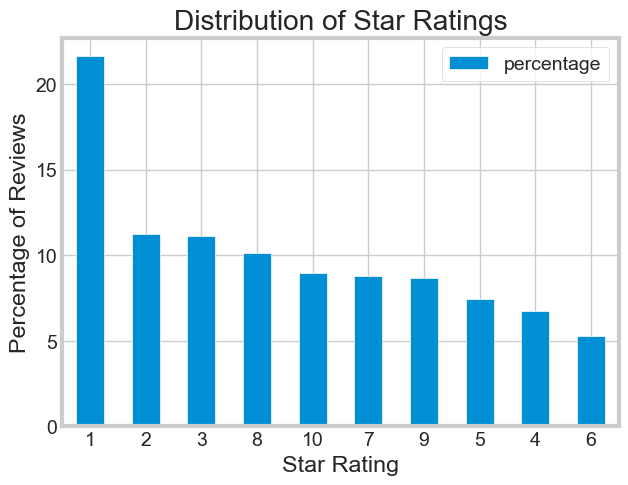

In [130]:
df_rating.plot.bar(x='rating', y='percentage', rot=0)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Percentage of Reviews')
plt.show()

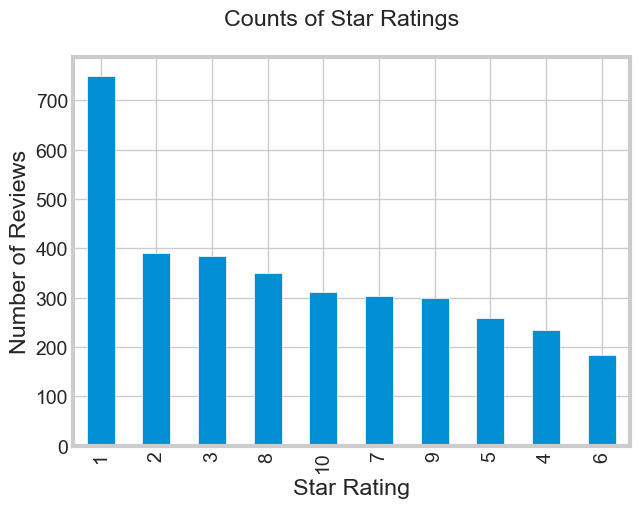

In [75]:
df['star'].value_counts().plot(kind='bar')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.suptitle('Counts of Star Ratings')
plt.show()

## which country most reviewed airwars ?

In [76]:
len(df['country'].unique())

69

In [77]:
df_country_review = pd.DataFrame(df['country'].value_counts().head(10)).reset_index()
df_country_review.rename(columns={'index': 'country', 'country': 'total_reviews'}, inplace=True)
df_country_review.head()

,country,total_reviews
0,United Kingdom,2211
1,United States,362
2,Australia,149
3,Canada,107
4,Germany,59


In [78]:
df_country_review['percentage'] = (df_country_review['total_reviews']/df_country_review['total_reviews'].sum())*100
df_country_review['percentage'] = df_country_review['percentage'].round(2)
df_country_review.head()

,country,total_reviews,percentage
0,United Kingdom,2211,72.28
1,United States,362,11.83
2,Australia,149,4.87
3,Canada,107,3.50
4,Germany,59,1.93


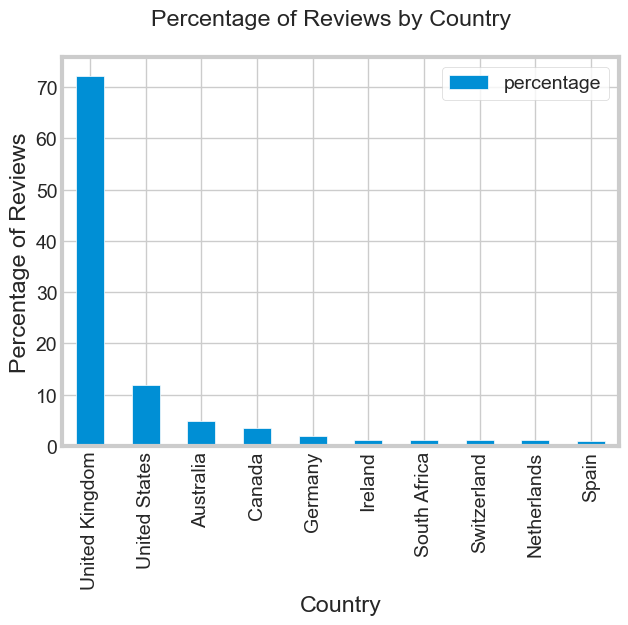

In [79]:
df_country_review.plot(kind='bar', x='country', y='percentage')
plt.xlabel('Country')
plt.ylabel('Percentage of Reviews')
plt.suptitle('Percentage of Reviews by Country')
plt.show()

## which country has the highest average number of reviews ?

In [80]:
df_country_rating = df.groupby('country').mean()['star'].sort_values(ascending=False).reset_index()
df_country_rating.head()

C:\Users\Silent Monster\AppData\Local\Temp\ipykernel_8248\2980865615.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,country,star
0,Saint Kitts and Nevis,10.0
1,Oman,10.0
2,Laos,10.0
3,Barbados,9.0
4,Dominican Republic,9.0


In [81]:
df_country_rating.rename(columns={'index': 'country', 'star': 'avg_rating'}, inplace=True)

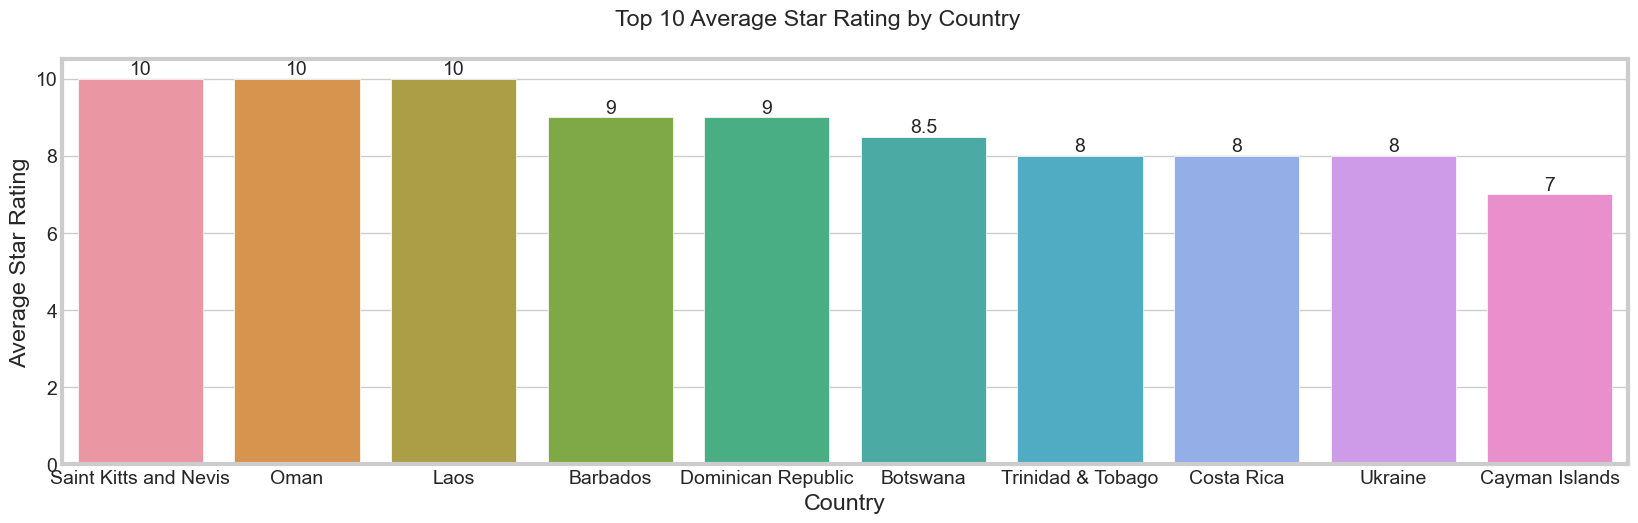

In [82]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:10])
ax.bar_label(ax.containers[0])
plt.xlabel('Country')
plt.ylabel('Average Star Rating')
plt.suptitle('Top 10 Average Star Rating by Country')
plt.show()

# Time Series

In [86]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [88]:
df.head()

,reviews,star,date,country,corpus,verified,month,year
0,"✅ Trip Verified | Very competent check in staff, saw had a problem with my left arm and insisted I could not take exit seat. Moved me to row 30 where the middle seat was empty. On the other hand on board - huge line for toilets - 45 min into a 2.30 min flight a crew member realised one of the toilets is closed - as crew had put their luggage there. They announced that they could not serve hot drinks on this flight and to bear with them as service will be slow. On asking why: ""They did not give us enough cups for hot drinks. And the card machine is not working so we have to fill out each credit card slip"". A bottle of water and a nutrigrain bar.",5,2023-02-23,United Arab Emirates,competent check staff saw problem left arm insisted could take exit seat moved row middle seat empty hand board huge line toilet min min flight crew member realised one toilet closed crew put luggage announced could serve hot drink flight bear service slow asking give u enough cup hot drink card machine working fill credit card slip bottle water nutrigrain bar,True,2,2023
1,"✅ Trip Verified | Check in was so slow, no self check in and bag drop. Boarding was ok, flight totally full. Booked row 9 which was ok. Some space in overhead bins. Seat and legroom ok. Cabin crew ok, smiled, gave out the bottle of water and pretzels. Flight itself was ok, landed 25 mins early and then waited 30 minutes for a stand and ground crew. Bags came off reasonably quickly. BA still seems to believe it is something special, a premium carrier. The reality is that it is not. The only reason we flew BA was we got virtually free tickets because both flights were cancelled last year. BA is our carrier of last choice.",4,2023-02-18,United Kingdom,check slow self check bag drop boarding ok flight totally full booked row ok space overhead bin seat legroom ok cabin crew ok smiled gave bottle water pretzel flight ok landed min early waited minute stand ground crew bag came reasonably quickly ba still seems believe something special premium carrier reality reason flew ba got virtually free ticket flight cancelled last year ba carrier last choice,True,2,2023
2,"✅ Trip Verified | My review relates to the appalling experiences I had with British Airways on 14th February 2023. I was due to travel to Madrid with British Airways and before setting off I heard on the radio that there were flight delays. I looked at the Heathrow Airport website and saw that my flight had been cancelled. As a result of the information on the website, I called British Airways and have 26 minutes on hold I found myself speaking to somebody in a call centre in South Africa. The person was hard to understand due to a heavy accent and he was incompetent and insisted that the flight was not cancelled. I made my way to Heathrow and sure enough the flight was indeed cancelled. The woman in question had the audacity to declare that the flight was cancelled and that “there are no facilities here at the airport to rebook you”. She refused to let me and about 12 other people join the queue for the clearly marked assistance desk. The same woman and one of her colleagues gave out a card with a telephone number and told one rather elderly gentleman to “go online to rebook your seat”. I am visually impaired and found the attitude of the BA employee to be appalling. I called the number on the card the employee gave me and was again in a long queue to a call centre. The person who picked up the phone kept me waiting 22 minutes and declared that the flight was not cancelled and that the airport “must be wrong”. He then in a flippant tone said he was just informed that the flight was indeed cancelled and that I would have to go and speak to IBERIA customer services in Heathrow to rebook! I took the elderly gentleman with me to IBERIA where the counter staff member rolled her eyes in disgust and said that it was nothing to do with IBERIA. I returned to BA and this time I j

In [97]:
df.groupby(['month', 'year']).size().reset_index(name='counts')

,month,year,counts
0,1,2015,76
1,1,2016,51
2,1,2017,59
3,1,2018,30
4,1,2019,34
...,...,...,...
103,12,2018,25
104,12,2019,27
105,12,2020,7
106,12,2021,14


In [94]:
fig_month = px.line(df.groupby(['month', 'year']).size().reset_index(name='counts'), 
                    x='month', y='counts', title='Monthly Reviews')
fig_month.show()

In [101]:
fig_year = px.line(df.groupby(['month', 'year']).size().reset_index(name='counts'), 
                    x='year', y='counts', title='Year Reviews')
fig_year.show()

In [105]:
fig = px.line(df, x='date', y='star', title='Star Rating by Date')
fig.show()

It can be seen that between April 2020 and August 2021 there was a drop in reviews due to the Covid Pandemic travel restrictions. 

# Word Frequency

In [107]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [109]:
# tokenisasi, menghapus kata-kata yang tidak diperlukan, dan melakukan stemming
stop_words = set(stopwords.words('english'))
stemmer = nltk.stem.SnowballStemmer('english')
df['corpus'] = df['corpus'].apply(lambda x: [stemmer.stem(word) for word in word_tokenize(x) if word not in stop_words])

In [111]:
# menggabungkan token-token kembali menjadi kalimat
df['corpus'] = df['corpus'].apply(lambda x: ' '.join(x))

In [113]:
# menghitung frekuensi kemunculan kata-kata pada seluruh teks
word_freq = {}
for text in df['corpus']:
    for word in word_tokenize(text):
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

In [114]:
# menampilkan 10 kata yang paling sering muncul
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_words = sorted_word_freq[:10]
print('Top 10 Words:')
for word, freq in top_words:
    print(f'{word}: {freq}')

Top 10 Words:
flight: 7330
seat: 4726
ba: 4677
servic: 2800
time: 2309
food: 2284
london: 2137
crew: 2124
british: 2035
airway: 2026


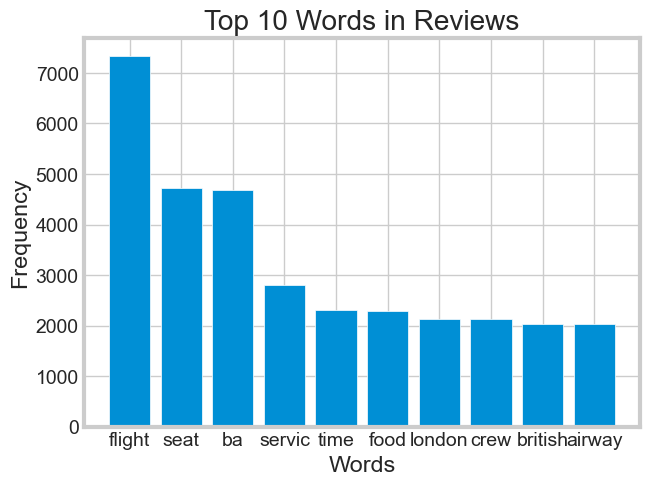

In [122]:
# membuat bar chart untuk visualisasi frekuensi kemunculan kata-kata
plt.bar(range(len(top_words)), [val[1] for val in top_words], align='center')
plt.xticks(range(len(top_words)), [val[0] for val in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Reviews')
plt.show()

# Wordcloud

In [118]:
# menggabungkan semua teks menjadi satu string
all_text = ' '.join(text for text in df['corpus'])

In [119]:
# membuat wordcloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(all_text)

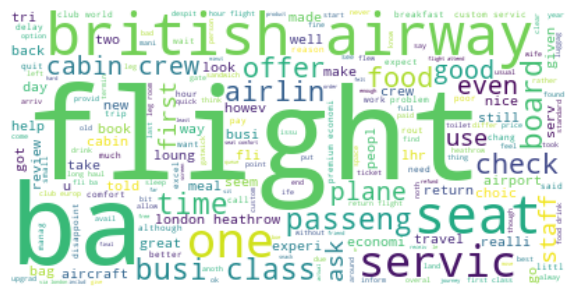

In [121]:
# menampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Analisis Sentiment

In [133]:
from textblob import TextBlob

In [136]:
# menghitung polaritas dan subjektivitas setiap review
df['polarity'] = df['corpus'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['corpus'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [138]:
# menentukan sentimen berdasarkan polaritas
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 
                                            else 'negative' if x < 0 
                                            else 'neutral')

In [140]:
# menampilkan hasil analisis sentiment
print('Jumlah review positif:', len(df[df['sentiment'] == 'positive']))
print('Jumlah review negatif:', len(df[df['sentiment'] == 'negative']))
print('Jumlah review netral:', len(df[df['sentiment'] == 'neutral']))

Jumlah review positif: 2603
Jumlah review negatif: 785
Jumlah review netral: 81
